In [9]:
import io
import base64
import requests
from PIL import Image
import json

import pandas as pd


import httpx
import asyncio
from httpx import TimeoutException

In [36]:
doc = pd.read_parquet(f'pdf_context/embedding/IONIQ5_2024_embeddings.parquet')
doc['doc_contents'].drop_duplicates().values.tolist()

['\nEV 모드\n\n인포테인먼트(오디오, 비디오, 내비게이션) 홈 화면에서 ‘EV’ 메뉴를 선택하면 EV 모드로 진입합니다.\n\n[EV 모드 화면 구성 ]\nEV 모드 화면 구성 \n\n(1) 솔라 루프 정보(2) 에너지 정보(3) 다음 출발 시간(4) 예약 충전 및 공조(5) 전기 사용 설정 (V2L)(6) 충전소 검색(7) EV 설정(8) 메뉴',
 '[EV 설정]\nEV 설정\n\n화면에서 ‘EV 설정’을 선택하십시오.충전 목표 배터리량, 충전 전류, 배터리 컨디셔닝 모드 및 유틸리티 모드 기능을 설정할 수 있습니다. \n\n충전 목표 배터리량 설정\n\n\n 급속 충전이나 완속 충전할 때, 배터리 목표충전량을 설정하여 운전자가 원하는 최종 충전량을 선택할 수 있습니다.\n\n 50 ~ 100% 까지 10% 단위로 배터리 충전량을 변경할 수 있습니다. 배터리 목표 충전량이 현재 배터리 충전량보다 낮을 경우 충전할 수 없습니다.\n\n충전 전류 설정\n\n\n 완속 충전을 할 때 고정용 또는 휴대용 충전케이블에 적합한 완속 충전 전류를 선택할수 있습니다. 완속 충전기 또는 휴대용 충전 케이블로 충전할 때 충전이 되지 않거나 충전이 중단되면 입력 전류 크기를 조정하여 충전을 다시해보십시오. 충전 전류 설정에 따라 충전 시간이 달라질수 있습니다.\n\n배터리 컨디셔닝 모드\n\n\n 배터리 컨디셔닝 모드는 구동용(고전압) 배터리의 온도가 낮아 성능이 떨어지는 겨울철에 유용한 기능입니다. 겨울철 주행 성능과급속 충전 성능 유지를 위해 배터리 컨디셔닝 모드의 사용을 권장합니다. 단, 배터리의온도를 높이기 위해서 에너지를 소모하기 때문에 주행 가능 거리가 짧아질 수 있습니다. 배터리 컨디셔닝 모드는 주행 중에 배터리의온도가 낮으면 적정 온도까지 배터리 온도를높여줍니다. 또한, 주행 전 예약 공조 및 원격공조를 실행할 때 배터리 온도가 낮으면 주행 성능을 향상시키기 위해 배터리 컨디셔닝모드가 작동됩니다. 단, 배터리 충전량이 낮은 경우 주행 가능 거리 확보를 위

In [32]:
def query_to_mechanic(query):
    url = "http://localhost:8000/get_car_information/?q={}".format(query)
    result = requests.get(url)
    res = json.loads(result.content)

    bytes_list = list(map(lambda x: base64.b64decode(x), res['image']))
    image_list = list(map(lambda x: Image.open(io.BytesIO(x)), bytes_list))


    print(f"질문: {res['query']}")
    print(f"대답: {res['answer']}")
    for img in image_list:
        display(img)

In [10]:
import httpx


In [12]:
def query_to_mechanic(query):
    url = "http://localhost:8000/aget_car_information/?namespace={}, q={}".format('IONIQ5_2024', query= query)
    result = requests.get(url)
    res = json.loads(result.content)

    # bytes_list = list(map(lambda x: base64.b64decode(x), res['image']))
    # image_list = list(map(lambda x: Image.open(io.BytesIO(x)), bytes_list))


    print(f"질문: {res['query']}")
    print(f"대답: {res['answer']}")
    # for img in image_list:
    #     display(img)
        
        
async def get_streaming_response(namespace, query):
    async with httpx.AsyncClient(timeout=None) as client:
        async with client.stream('GET', 'http://localhost:8000/aget_car_information/', params={'namespace': namespace, 'query': query}) as response:
            # TODO: ver 1
            # TODO: json 분리 확인 1 response['text']
            # TODO: 안되면 아래처럼
            async for chunk in response.aiter_bytes():
                yield chunk

In [15]:
async def get_streaming_response(namespace, query):
    async with httpx.AsyncClient(timeout=None) as client:
        async with client.stream('GET', 'http://localhost:8000/aget_car_information/', params={'namespace': namespace, 'query': query}) as response:
            async for chunk in response.aiter_text():
                yield chunk

In [17]:
query = "안전벨트는 어떻게 착용해야 안전한가요?"
res = get_streaming_response('IONIQ5_2024', query)
async for chunk in res:
    print(chunk)

my-custom-boundary
Content-Type: text/plain

안
my-custom-boundary
Content-Type: text/plain

['image/IONIQ5_2024/81_1_img.jpeg', 'image/IONIQ5_2024/116_4_img.jpeg', 'image/IONIQ5_2024/116_6_img.jpeg', 'image/IONIQ5_2024/117_1_img.jpeg', 'image/IONIQ5_2024/117_4_img.jpeg', 'image/IONIQ5_2024/117_7_img.jpeg', 'image/IONIQ5_2024/113_5_img.jpeg']


my-custom-boundary--

my-custom-boundary
Content-Type: text/plain

전
my-custom-boundary
Content-Type: text/plain

['image/IONIQ5_2024/81_1_img.jpeg', 'image/IONIQ5_2024/116_4_img.jpeg', 'image/IONIQ5_2024/116_6_img.jpeg', 'image/IONIQ5_2024/117_1_img.jpeg', 'image/IONIQ5_2024/117_4_img.jpeg', 'image/IONIQ5_2024/117_7_img.jpeg', 'image/IONIQ5_2024/113_5_img.jpeg']


my-custom-boundary--

my-custom-boundary
Content-Type: text/plain

벨
my-custom-boundary
Content-Type: text/plain

['image/IONIQ5_2024/81_1_img.jpeg', 'image/IONIQ5_2024/116_4_img.jpeg', 'image/IONIQ5_2024/116_6_img.jpeg', 'image/IONIQ5_2024/117_1_img.jpeg', 'image/IONIQ5_2024/117_4_img

In [6]:
res

<async_generator object get_streaming_response at 0x1273c34c0>

질문: 에어컨 바람을 조절하고 싶습니다.
대답: 에어컨 바람을 조절하려면 히터 및 에어컨 버튼에서 풍량 조절 버튼을 눌러 원하는 풍량을 설정하십시오.


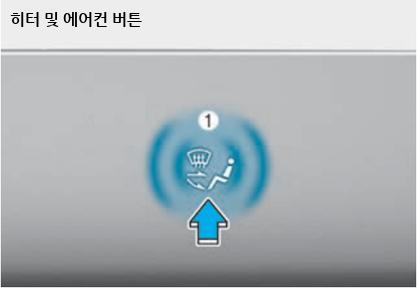

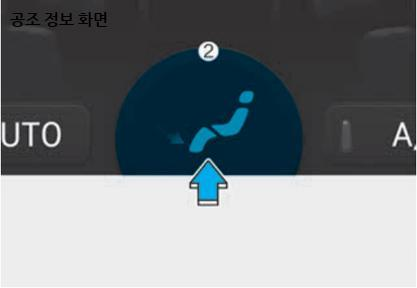

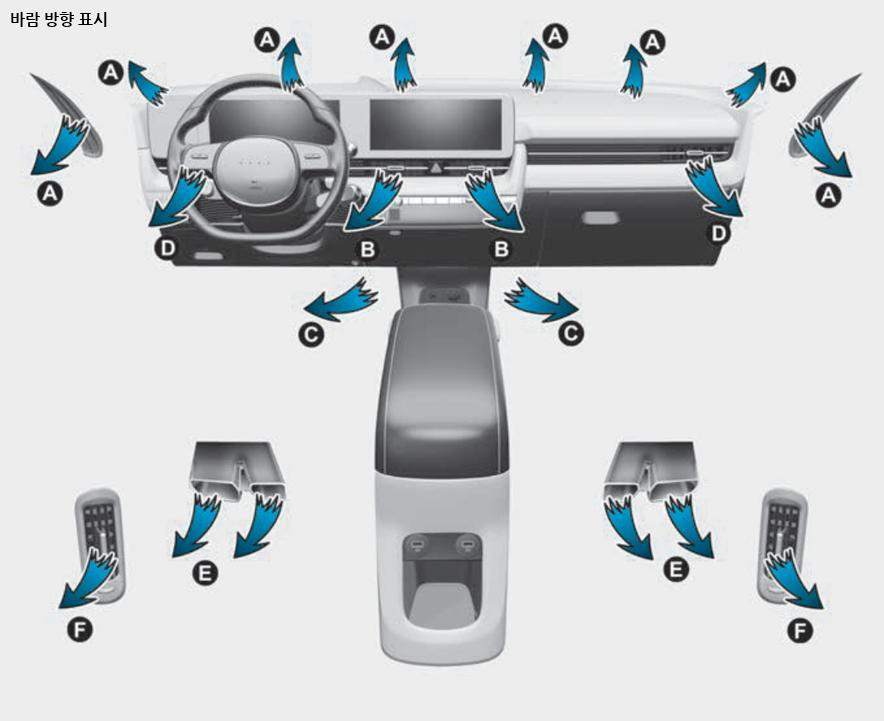

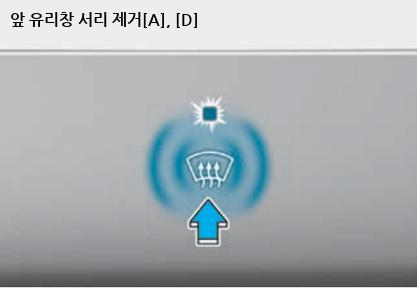

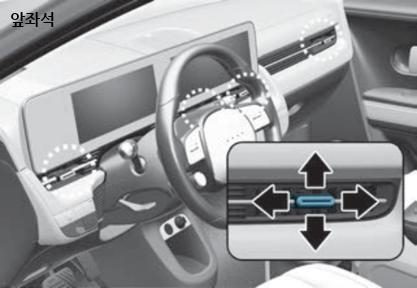

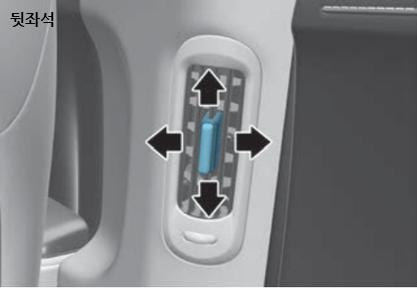

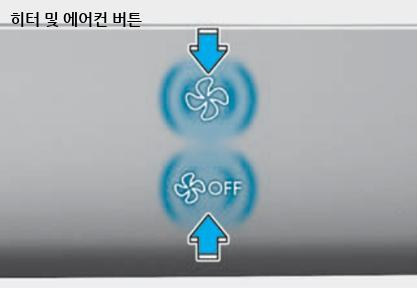

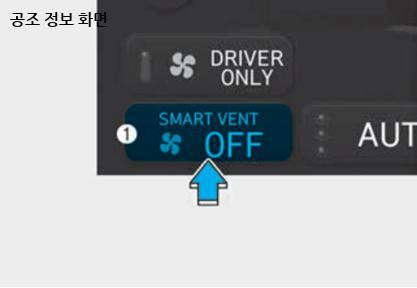

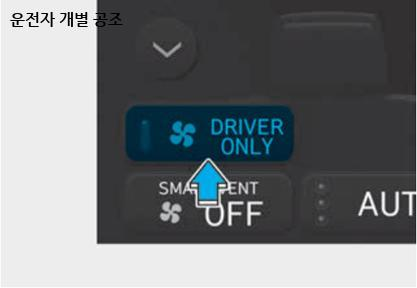

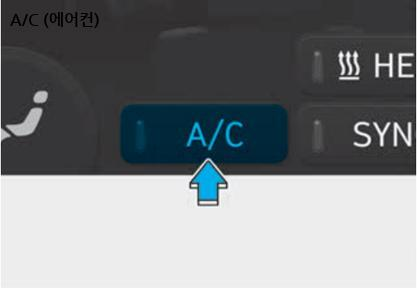

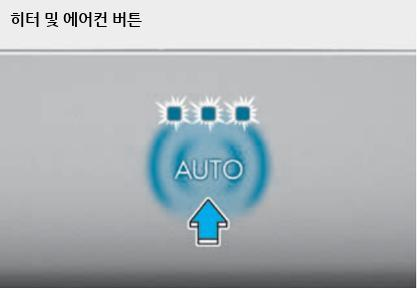

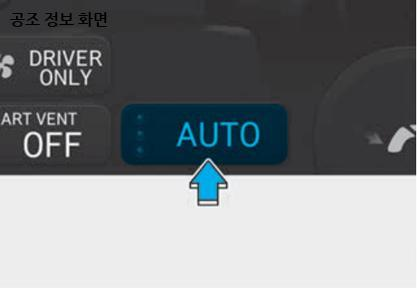

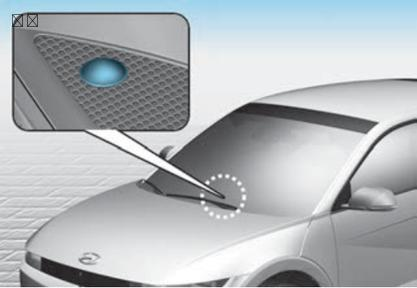

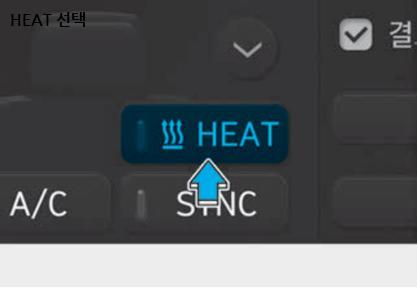

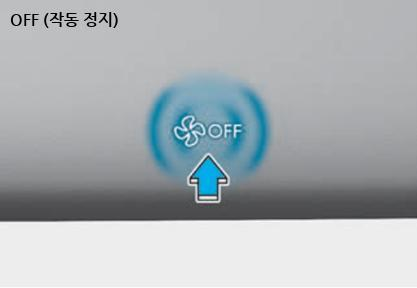

In [37]:
query = "에어컨 바람을 조절하고 싶습니다."
query_to_mechanic(query)

질문: 차량 사고 및 화재 발생 시 조치사항
대답: 차량 사고 및 화재 발생 시 조치사항은 비상경고등을 켜고 차량을 안전한 장소로 이동시키고 시동을 끈 후 안전한 곳으로 대피하고 다른 사람들이 접근하지 않도록 조치해야 합니다. 누출된 액체가 피부에 닿지 않도록 주의해야 하며, 화재 진압을 위해서는 전기 차량 화재 전용 분말 소화기를 사용해야 합니다.화재 진압이 어려운 경우에는 안전한 장소로 대피하고 응급기관에 연락하여 조치를 받아야 합니다.


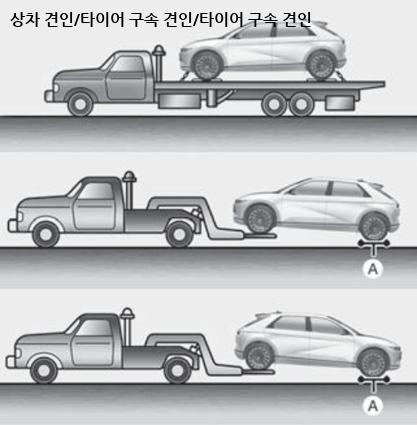

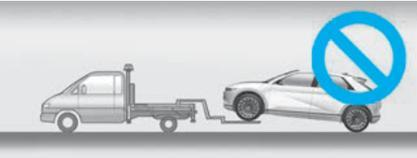

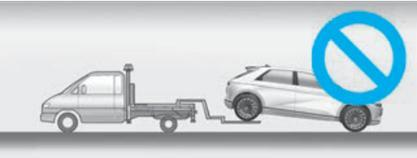

In [38]:
query = "차량 사고 및 화재 발생 시 조치사항"
query_to_mechanic(query)

질문: 차량 견인 시에 유의할 점이 있나요?
대답: 차량 견인 시에는 사륜을 모두 들어 올려서 견인하거나 돌리(바퀴 달린 수레)를 사용하여 견인해야 합니다. 또한, 사륜구동 차량은 일반 견인 트럭으로 견인할 수 없으며, 반드시 사륜을 들어 올려 견인해야 합니다. 견인 시에는 안전을 위해 주의해야 합니다.


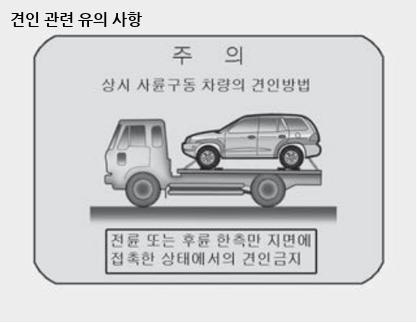

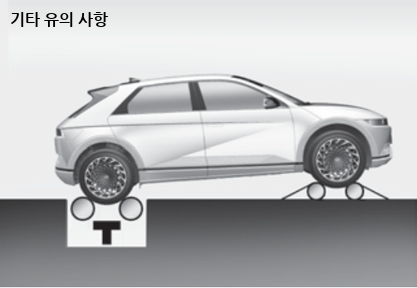

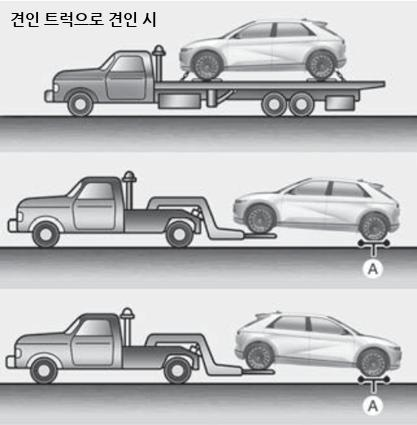

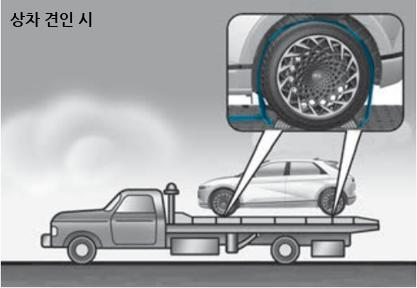

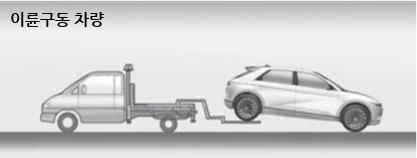

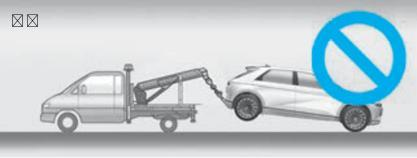

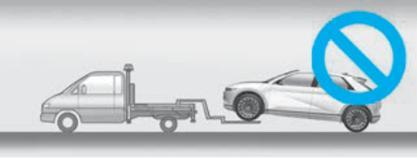

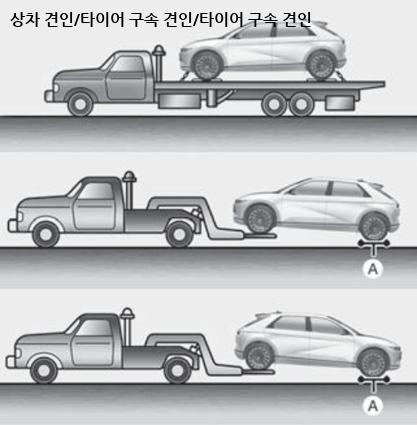

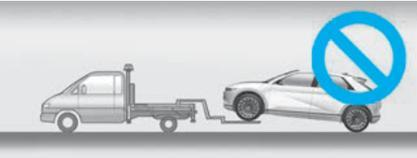

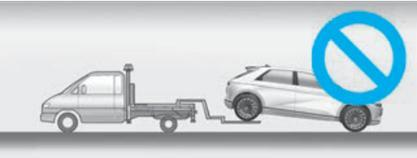

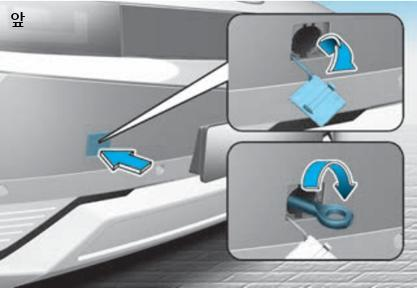

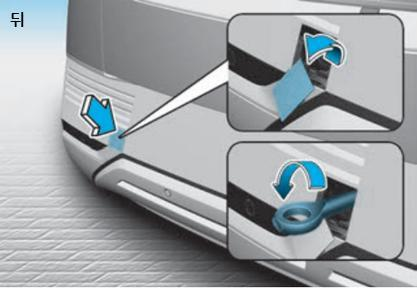

In [39]:
query = "차량 견인 시에 유의할 점이 있나요?"
query_to_mechanic(query)

질문: 스마트 회생 시스템이 무엇인가요? 구체적으로 알려주세요
대답: 스마트 회생 시스템은 전방 레이더 센서의 성능을 넘어서는 주행 상황에서 작동하는 시스템으로, 전방 차량 및 과속 카메라를 감지하여 회생 제동량을 조절하여 운전자의 규정 속도 준수를 도와주는 시스템입니다. 이 시스템은 전방 차량을 인식하지 못해 회생 제동 단계가 자동으로 감소하거나 증가하여 차량의 속도를 조절합니다.


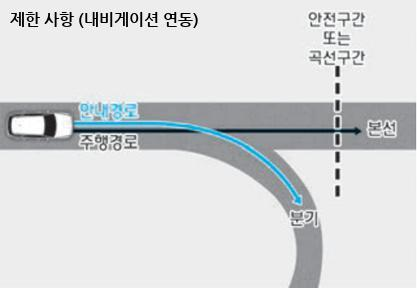

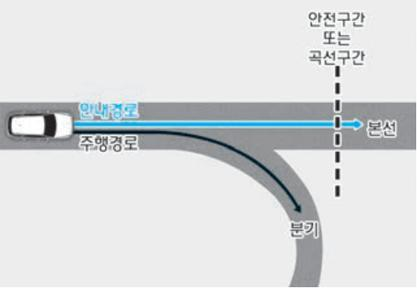

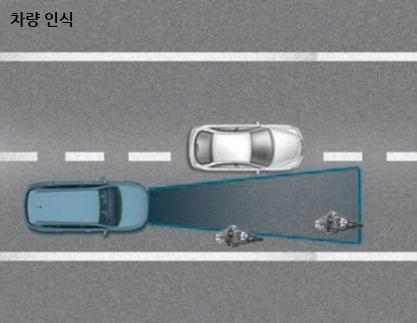

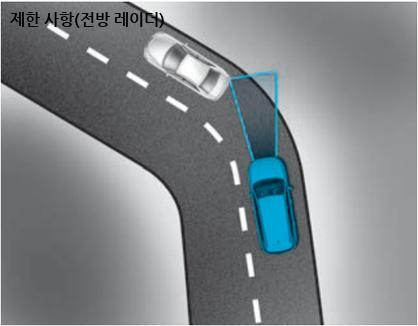

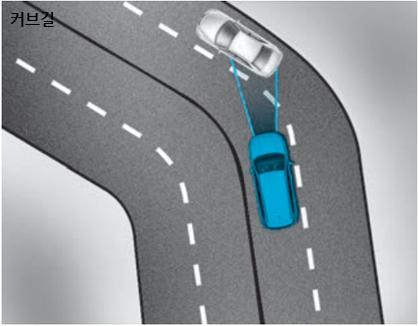

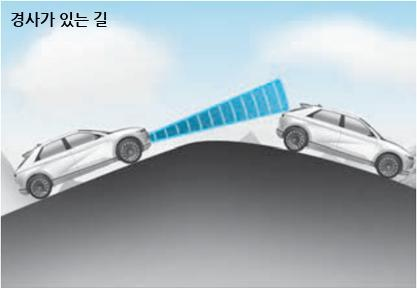

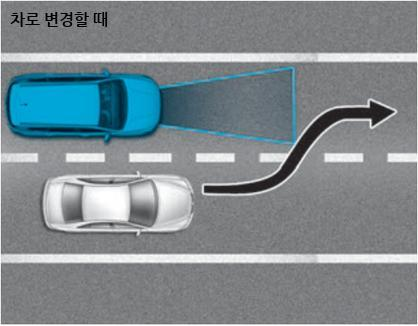

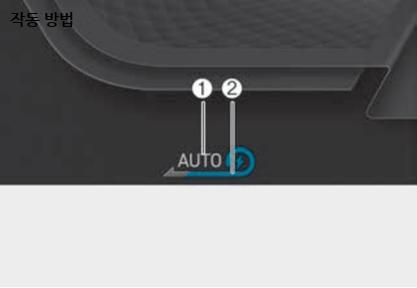

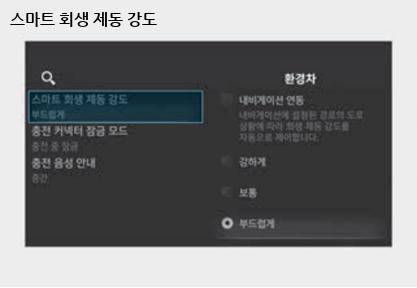

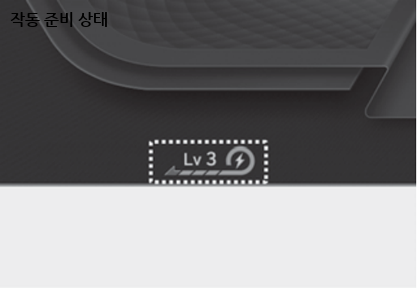

In [40]:
query = "스마트 회생 시스템이 무엇인가요? 구체적으로 알려주세요"
query_to_mechanic(query)